In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [2]:
def BN(nodes,fault):
    
    LABELS = []
    
    # Inputs 
    
    Shh = True
    Wnt = True
    GF = False # EGF or PDGF or IGF1
    IL17 = True # Cytokine
    Cytokine = True
    TNF = True
    PSEN = False
    TGFb = True
    S1P = False
    Antigen = False
    # G-coupled Proteins
    Dopamine = False
    GABA = False
    Ach = False
    HT = False
    PGE2 = False #
    EDN1 = False
    Norepinephrine = False
    F2 = False
    Estrogen = False
    Testosterone = False
    Progesterone = False #
    NF1 = True # 
    if nodes[138] == 1:
        NF1 = fault[138]
    ###############Giving value to the nodes (genes) based on Kegg information and assigning truth value to the selection of nodes
    # G-coupled Proteins
    DRD2 = Dopamine 
    LABELS.append('DRD2')
    if nodes[0] == 1:
        DRD2 = fault[0]
    HTR3A = HT 
    LABELS.append('HTR3A')
    if nodes[1] == 1:
        HTR3A = fault[1]
    HTR4 = HT
    LABELS.append('HTR4')
    if nodes[2] == 1:
        HTR4 = fault[2]
    ACHE = Ach
    LABELS.append('ACHE')
    if nodes[3] == 1:
        ACHE = fault[3]
    GABRA1 = GABA 
    LABELS.append('GABRA1')
    if nodes[4] == 1:
        GABRA1 = fault[4]
    EDNRA = EDN1
    LABELS.append('EDNRA')
    if nodes[5] == 1:
        EDNRA = fault[5]
    ADRB1 = Norepinephrine
    LABELS.append('ADRB1')
    if nodes[6] == 1:
        ADRB1 = fault[6]
    ADRB2 = Norepinephrine
    LABELS.append('ADRB2')
    if nodes[7] == 1:
        ADRB2 = fault[7]
    FKBP1A = 0
    LABELS.append('FKBP1A')
    if nodes[8] == 1:
        FKBP1A = fault[8]
    CA = 0
    LABELS.append('CA')
    if nodes[9] == 1:
        CA = fault[9]
    THBD = F2
    LABELS.append('THBD')
    if nodes[10] == 1:
        THBD = fault[10]
    GP1BA = 0
    LABELS.append('GP1BA')
    if nodes[11] == 1:
        GP1BA = fault[11]
   #####group of nodes/ assign from Kegg/ do not get the fault values
    GiGPCR = GABRA1 or ACHE or DRD2 or EDNRA or ADRB2 or F2
    GsGPCR = HTR4 or PGE2 or ADRB1
    
    # Histone DeAcetylation
    HDAC = 0
    LABELS.append('HDAC')
    if nodes[12] == 1:
        HDAC = fault[12]
    
    # Wnt Pathway
    Frizzled = Wnt
    LABELS.append('Frizzled')
    if nodes[13] == 1:
        Frizzled = fault[13]
    DV1 = Frizzled
    LABELS.append('DV1')
    if nodes[14] == 1:
        DV1 = fault[14]
    GSK3b = IL17 and not (DV1 or GF)
    LABELS.append('GSK3b')
    if nodes[15] == 1:
        GSK3b = fault[15]
    bCatenin = not GSK3b
    LABELS.append('bCatenin')
    if nodes[16] == 1:
        bCatenin = fault[16]
        
    # Notch 
    Notch = (PSEN and not DV1)
    LABELS.append('Notch')
    if nodes[17] == 1:
        Notch = fault[17]

    # Receptors 
    KDR = GF or (Notch and not HDAC)
    LABELS.append('KDR')
    if nodes[18] == 1:
        KDR = fault[18]
    FLT1 = GF 
    LABELS.append('FLT1')
    if nodes[19] == 1:
        FLT1 = fault[19]
    FLT3 = GF
    LABELS.append('FLT3')
    if nodes[20] == 1:
        FLT3 = fault[20]
    FLT4 = GF
    LABELS.append('FLT4')
    if nodes[21] == 1:
        FLT4 = fault[21]
    RET = GF
    LABELS.append('RET')
    if nodes[22] == 1:
        RET = fault[22]
    FGF2 = GF
    LABELS.append('FGF2')
    if nodes[23] == 1:
        FGF2 = fault[23]
    EGFR = GF
    LABELS.append('EGFR')
    if nodes[24] == 1:
        EGFR = fault[24]
    PDGFR = GF
    LABELS.append('PDGFR')
    if nodes[25] == 1:
        PDGFR = fault[25]  
    KIT = GF
    LABELS.append('KIT')
    if nodes[26] == 1:
        KIT = fault[26]
    ERBB2 = GF or (Notch and not HDAC)
    LABELS.append('ERBB2')
    if nodes[27] == 1:
        ERBB2 = fault[27]
    IGF1R = GF 
    LABELS.append('IGF1R')
    if nodes[28] == 1:
        IGF1R = fault[28]
    ALK = 0
    LABELS.append('ALK')
    if nodes[29] == 1:
        ALK = fault[29]   
    Syk = Antigen
    LABELS.append('Syk')
    if nodes[30] == 1:
        Syk = fault[30]
    BTK = Syk or GP1BA
    LABELS.append('BTK')
    if nodes[31] == 1:
        BTK = fault[31]
        
    RTK = (KDR or FLT3 or FLT4 or EGFR or FGF2 or PDGFR or KIT or ERBB2 or IGF1R)
    
    # Androgen Signaling
    AR = Testosterone or Progesterone
    LABELS.append('AR')
    if nodes[32] == 1:
        AR = fault[32]

    # cAMP-PKA Pathway 
    Gs = GsGPCR and not CA
    LABELS.append('Gs')
    if nodes[33] == 1:
        Gs = fault[33]
    Gi = GiGPCR or S1P
    LABELS.append('Gi')
    if nodes[34] == 1:
        Gi = fault[34]
    AC = Gs and not Gi
    LABELS.append('AC')
    if nodes[35] == 1:
        AC = fault[35]
    cAMP = AC and not (AR or IGF1R)
    LABELS.append('cAMP')
    if nodes[36] == 1:
        cAMP = fault[36]
    PKA = cAMP
    LABELS.append('PKA')
    if nodes[37] == 1:
        PKA = fault[37]
    
    # Actin
    ROCK = (TGFb or F2 or S1P) and not PKA
    LABELS.append('ROCK')
    if nodes[38] == 1:
        ROCK = fault[38]

    # Calcium Signaling
    Gq = GiGPCR or S1P
    LABELS.append('Gq')
    if nodes[39] == 1:
        Gq = fault[39]
    PLCb = Gq 
    LABELS.append('PLCb')
    if nodes[40] == 1:
        PLCb = fault[40]
    PLCg = RTK or ALK or ERBB2 or BTK
    LABELS.append('PLCg')
    if nodes[41] == 1:
        PLCg = fault[41]
    IP3R = PLCg or PLCb 
    LABELS.append('IP3R')
    if nodes[42] == 1:
        IP3R = fault[42]
    Ca2p = IP3R 
    
    DAG = PLCg or PLCb
    LABELS.append('DAG')
    if nodes[43] == 1:
        DAG = fault[43]
    PKC = (DAG and Ca2p)
    LABELS.append('PKC')
    if nodes[44] == 1:
        PKC = fault[44]

    # MAPK-ERK Pathway
    JAK = (Cytokine or RTK or ALK)
    LABELS.append('JAK')
    if nodes[45] == 1:
        JAK = fault[45]
    Shc = RTK 
    LABELS.append('Shc')
    if nodes[46] == 1:
        Shc = fault[46]
    Grb2 = Shc
    LABELS.append('Grb2')
    if nodes[47] == 1:
        Grb2 = fault[47]
    Sos = Grb2
    LABELS.append('Sos')
    if nodes[48] == 1:
        Sos = fault[48]
    Ras = (Sos or cAMP or RET or ALK) and not NF1
    LABELS.append('Ras')
    if nodes[49] == 1:
        Ras = fault[49]
    Raf = (Ras or PKC) and not PKA 
    LABELS.append('Raf')
    if nodes[50] == 1:
        Raf = fault[50]
    MEK = Raf
    LABELS.append('MEK')
    if nodes[51] == 1:
        MEK = fault[51]
    ERK = (MEK or IL17) 
    LABELS.append('ERK')
    if nodes[52] == 1:
        ERK = fault[52]

    # Estrogen Signaling
    ESR1 = ERK or Estrogen
    LABELS.append('ESR1')
    if nodes[53] == 1:
        ESR1 = fault[53]
    SRC = ESR1 or KDR or ERBB2 or EGFR
    LABELS.append('SRC')
    if nodes[54] == 1:
        SRC = fault[54]

    # PI3K-Akt Pathway
    PTEN = ROCK
    LABELS.append('PTEN')
    if nodes[55] == 1:
        PTEN = fault[55]
    PI3K = RTK or Ras or JAK or GiGPCR or GP1BA or ALK or IGF1R or Syk or SRC
    LABELS.append('PI3K')
    if nodes[56] == 1:
        PI3K = fault[56]
    PIP3 = PI3K and not PTEN
    LABELS.append('PIP3')
    if nodes[57] == 1:
        PIP3 = fault[57]
    PDK1 = PIP3 
    LABELS.append('PDK1')
    if nodes[58] == 1:
        PDK1 = fault[58]
    AKT = PDK1
    LABELS.append('AKT')
    if nodes[59] == 1:
        AKT = fault[59]

    # TNF Pathway
    TNFR = TNF
    LABELS.append('TNFR')
    if nodes[60] == 1:
        TNFR = fault[60]
    TRAF2 = TNFR or IL17
    LABELS.append('TRAF2')
    if nodes[61] == 1:
        TRAF2 = fault[61]
    RIP1 = TNFR
    LABELS.append('RIP1')
    if nodes[62] == 1:
        RIP1 = fault[62]

    # NFKB Pathway
    IKK = (TRAF2 or RIP1 or PDK1 or BTK)
    LABELS.append('IKK')
    if nodes[63] == 1:
        IKK = fault[63]
    NFKB = IKK or ROCK
    LABELS.append('NFKB')
    if nodes[64] == 1:
        NFKB = fault[64]
    
    # AMP Pathway
    LKB1 = cAMP
    LABELS.append('LKB1')
    if nodes[65] == 1:
        LKB1 = fault[65]
    AMPK = LKB1 
    LABELS.append('AMPK')
    if nodes[66] == 1:
        AMPK = fault[66]

    # mTOR Pathway
    RSK2 = ERK 
    LABELS.append('RSK2')
    if nodes[67] == 1:
        RSK2 = fault[67]
    TSC = ((GSK3b and not AKT) or AMPK) and not (IKK or RSK2 or ERK or AKT)
    LABELS.append('TSC')
    if nodes[68] == 1:
        TSC = fault[68]
    Rheb = not TSC
    LABELS.append('Rheb')
    if nodes[69] == 1:
        Rheb = fault[69]
    mTORc1 = (AKT or Rheb or IKK) and not AMPK
    LABELS.append('mTORc1')
    if nodes[70] == 1:
        mTORc1 = fault[70]
    S6K = mTORc1 or ERK or TGFb
    LABELS.append('S6K')
    if nodes[71] == 1:
        S6K = fault[71]
    mTORc2 = (PI3K or IKK) and not S6K
    LABELS.append('mTORc2')
    if nodes[72] == 1:
        mTORc2 = fault[72]
    STAT3 = JAK 
    LABELS.append('STAT3')
    if nodes[73] == 1:
        STAT3 = fault[73]
    VEGF = STAT3 or KDR
    LABELS.append('VEGF')
    if nodes[74] == 1:
        VEGF = fault[74]
        
    # DNA Damage and Methylation
    eNOS = VEGF or AKT or ADRB1 or ADRB2
    LABELS.append('eNOS')
    if nodes[75] == 1:
        eNOS = fault[75]
    NO = eNOS 
    
    OG = NO
    LABELS.append('OG')
    if nodes[76] == 1:
        OG = fault[76]
    MGMT = OG and HDAC 
    LABELS.append('MGMT')
    if nodes[77] == 1:
        MGMT = fault[77]
    DNADamage = OG and not (MGMT or HDAC)
    

    # Hypoxia
    IDH = 0
    LABELS.append('IDH1')
    if nodes[78] == 1:
        IDH = fault[78]
    aKG = IDH
    
    HIF1a = NFKB or STAT3 or ERK or S6K 
    LABELS.append('HIF1a')
    if nodes[79] == 1:
        HIF1a = fault[79]
    Hypoxia = HIF1a or (NO and not (aKG or PKC)) 
    
    iNOS = Hypoxia
    LABELS.append('iNOS')
    if nodes[80] == 1:
        iNOS = fault[80]
    COX2 = (NFKB or (VEGF and Ca2p) or PGE2) 
    LABELS.append('COX2')
    if nodes[81] == 1:
        COX2 = fault[81]
    
    # ER Stress
    ERStress = IP3R or Hypoxia
    
    PERK = ERStress
    LABELS.append('PERK')
    if nodes[82] == 1:
        PERK = fault[82]
    ELF2a = PERK
    LABELS.append('ELF2a')
    if nodes[83] == 1:
        ELF2a = fault[83]
    IRE1a = ERStress
    LABELS.append('IRE1a')
    if nodes[84] == 1:
        ELF2a = fault[84]
        
    # TGFb Pathway
    TGFbR = TGFb or HIF1a
    LABELS.append('TGFbR')
    if nodes[85] == 1:
        TGFbR = fault[85]
    SMAD23 = TGFbR and not (TNF or Cytokine or FKBP1A)
    LABELS.append('SMAD23')
    if nodes[86] == 1:
        SMAD23 = fault[86]
        
    # JNK Pathway
    MEKK1 = TRAF2 or TGFbR or SRC
    LABELS.append('MEKK1')
    if nodes[87] == 1:
        MEKK1 = fault[87]
    JNK = (Ras and not AKT) or MEKK1 or IRE1a
    LABELS.append('JNK')
    if nodes[88] == 1:
        JNK = fault[88]

    # cGMP-PKG Pathway
    sGC = NO or eNOS
    LABELS.append('sGC')
    if nodes[89] == 1:
        sGC = fault[89]
    cGMP = sGC 
    
    PKG = cGMP
    LABELS.append('PKG')
    if nodes[90] == 1:
        PKG = fault[90]
    
    # PPAR signaling
    PPARa = PKA
    LABELS.append('PPARa')
    if nodes[91] == 1:
        PPARa = fault[91]
    PPARg = mTORc1
    LABELS.append('PPARg')
    if nodes[92] == 1:
        PPARg = fault[92]

    # Targets
    PIAS = DNADamage
    LABELS.append('PIAS')
    if nodes[93] == 1:
        PIAS = fault[93]
    cMyc = (bCatenin or ESR1 or (STAT3 and not PIAS)) 
    LABELS.append('cMyc')
    if nodes[94] == 1:
        cMyc = fault[94]
    CREB = PKA or PKG or RSK2 or AKT or ELF2a
    LABELS.append('CREB')
    if nodes[95] == 1:
        CREB = fault[95]
    CHOP = CREB
    LABELS.append('CHOP')
    if nodes[96] == 1:
        CHOP = fault[96]
    FOXO = (AMPK or JNK or STAT3) and not (AKT or ERK or (IKK and PDK1) or mTORc2)
    LABELS.append('FOXO')
    if nodes[97] == 1:
        FOXO = fault[97]
    p15 = (FOXO or SMAD23) and not (HDAC or cMyc)
    LABELS.append('p15')
    if nodes[98] == 1:
        p15 = fault[98]

    # Hedgehog Pathway
    GliR = PKA and GSK3b
    LABELS.append('GliR')
    if nodes[99] == 1:
        GliR = fault[99]
    GliA = Shh
    LABELS.append('GliA')
    if nodes[100] == 1:
        GliA = fault[100]
    Gli = GliA and not GliR
    

    # p53 Signaling
    fos = JNK or (CREB and PKA) or (cMyc and ERK)
    LABELS.append('fos')
    if nodes[101] == 1:
        fos = fault[101]
    jun = bCatenin or JNK or (CREB and PKA)
    LABELS.append('jun')
    if nodes[102] == 1:
        jun = fault[102]
    ATM = DNADamage or FOXO
    LABELS.append('ATM')
    if nodes[103] == 1:
        ATM = fault[103]
    CHK1 = ATM
    LABELS.append('CHK1')
    if nodes[104] == 1:
        CHK1 = fault[104]
    p16INK4a = (SMAD23 and not cMyc)
    LABELS.append('p16INK4a')
    if nodes[105] == 1:
        p16INK4a = fault[105]
    p14ARF = (DNADamage)
    LABELS.append('p14ARF')
    if nodes[106] == 1:
        p14ARF = fault[106]
    MDM2 = AKT and not p14ARF
    LABELS.append('MDM2')
    if nodes[107] == 1:
        MDM2 = fault[107]
    p53 = ((JNK or CHK1 or ERStress or NO or Hypoxia) and not MDM2)
    LABELS.append('p53')
    if nodes[108] == 1:
        p53 = fault[108]
    PCNA = p53
    LABELS.append('PCNA')
    if nodes[109] == 1:
        PCNA = fault[109]
    CDC25 = not CHK1
    LABELS.append('CDC25')
    if nodes[110] == 1:
        CDC25 = fault[110]
    p21 = ((p53 or FOXO) or (STAT3 and not PIAS)) and not AKT 
    LABELS.append('p21')
    if nodes[111] == 1:
        p21 = fault[111]

    # Apoptosis
    MMP1 = PPARg
    LABELS.append('MMP1')
    if nodes[112] == 1:
        MMP1 = fault[112]
    MMP2 = SRC or GABRA1 or PKC or NFKB or (fos and jun)
    LABELS.append('MMP2')
    if nodes[113] == 1:
        MMP2 = fault[113]
    PAI = (p53 or SMAD23 or HIF1a) and not THBD
    LABELS.append('PAI')
    if nodes[114] == 1:
        PAI = fault[114]
    PARP1 = DNADamage
    LABELS.append('PARP1')
    if nodes[115] == 1:
        PARP1 = fault[115]
    Calpain = (ERStress or PARP1)
    LABELS.append('Calpain')
    if nodes[116] == 1:
        Calpain = fault[116]
    TERT = 0
    LABELS.append('TERT')
    if nodes[117] == 1:
        TERT = fault[117]
        
    Rac = (PIP3 and VEGF)
    LABELS.append('Rac')
    if nodes[118] == 1:
        Rac = fault[118]
    cPLA2 = (Ca2p and VEGF)
    LABELS.append('cPLA2')
    if nodes[119] == 1:
        cPLA2 = fault[119]
        
    CCND1 = (bCatenin or Gli or ESR1 or (fos and jun)) and not (p21 or p15 or (GSK3b and not AKT) or PCNA)
    LABELS.append('CCND1')
    if nodes[120] == 1:
        CCND1 = fault[120]
    CDK4 = (CDC25 or (fos and jun)) and not p16INK4a
    LABELS.append('CDK4')
    if nodes[121] == 1:
        CDK4 = fault[121]
        
    CASP12 = Calpain
    LABELS.append('CASP12')
    if nodes[122] == 1:
        CASP12 = fault[122]
    cFLIP = NFKB and not JNK 
    LABELS.append('cFLIP')
    if nodes[123] == 1:
        cFLIP = fault[123]
    FasL = FOXO or fos or jun or TNF
    LABELS.append('FasL')
    if nodes[124] == 1:
        FasL = fault[124]
    FADD = (FasL and not COX2)
    LABELS.append('FADD')
    if nodes[125] == 1:
        FADD = fault[125]
    CASP8 = (FADD or TNFR) and not cFLIP
    LABELS.append('CASP8')
    if nodes[126] == 1:
        CASP8 = fault[126]
    Bid = p53 or JNK or CASP8
    LABELS.append('Bid')
    if nodes[127] == 1:
        Bid = fault[127]
    Mcl1 = (CREB and AKT) or (STAT3) 
    LABELS.append('Mcl1')
    if nodes[128] == 1:
        Mcl1 = fault[128]
    puma = p53
    LABELS.append('puma')
    if nodes[129] == 1:
        puma = fault[129]
    noxa = p53
    LABELS.append('noxa')
    if nodes[130] == 1:
        noxa = fault[130]
    XIAP = TRAF2
    LABELS.append('XIAP')
    if nodes[131] == 1:
        XIAP = fault[131]
    Bad = (PKG or DNADamage) and not (AKT or PKA)
    LABELS.append('Bad')
    if nodes[132] == 1:
        Bad = fault[132]
    BCL2 = (Gli or ESR1 or (CREB and AKT) or (STAT3 and not PIAS)) and not (puma or noxa or Bid or CHOP or PPARa or JNK or Bad) 
    LABELS.append('BCL2')
    if nodes[133] == 1:
        BCL2 = fault[133]
    BCLxl = (STAT3 and not PIAS) or (NFKB) 
    LABELS.append('BCLxl')
    if nodes[134] == 1:
        BCLxl = fault[134]
    Bim = (FOXO or fos or jun or DNADamage) and not Mcl1
    LABELS.append('Bim')
    if nodes[135] == 1:
        Bim = fault[135]
    Bak = (p53 or Bim) and not (BCL2 or BCLxl)
    LABELS.append('Bak')
    if nodes[136] == 1:
        Bak = fault[136]
    Bax = (p53 or Bid) and not (BCL2 or BCLxl)
    LABELS.append('Bax')
    if nodes[137] == 1:
        Bax = fault[137] 
        
    AVGBak = np.average([Bak,p53,Bim,not BCL2,not BCLxl],weights=[1/6,1/6,1/6,1/4,1/4])
    AVGBax = np.average([Bax,p53,Bid,not BCL2,not BCLxl],weights=[1/6,1/6,1/6,1/4,1/4])
    AVGBid = np.average([Bid,p53,JNK,CASP8],weights=[1/4,1/4,1/4,1/4])
    AVGCASP8 = np.average([CASP8,FADD,TNFR,not cFLIP],weights=[1/6,1/6,1/6,1/2])
    AVGDNADamage = np.average([DNADamage,OG,not MGMT,not HDAC],weights=[1/4,1/4,1/4,1/4])
    AVGBCL2 = np.average([BCL2,Gli,ESR1,CREB,AKT,STAT3,not PIAS,not puma,not noxa, not Bid, not CHOP,not PPARa,not JNK,not Bad],weights=[1/12,1/12,1/12,1/12,1/12,1/12,1/16,1/16,1/16,1/16,1/16,1/16,1/16,1/16])
    AVGBCLxl = np.average([BCLxl,STAT3,NFKB,not PIAS],weights=[1/6,1/6,1/6,1/2])
    AVGMcl1 = np.average([CREB,AKT,STAT3],weights=[1/3,1/3,1/3])
    AVGcFLIP = np.average([NFKB,not JNK],weights=[1/2,1/2])
    AVGCDK4 = np.average([CDK4,CDC25,fos,jun,not p16INK4a],weights=[1/8,1/8,1/8,1/8,1/2])
    AVGCCND1 = np.average([CCND1,bCatenin,Gli,ESR1,fos,jun,AKT,not p21,not p15,not GSK3b,not PCNA],weights=[1/14,1/14,1/14,1/14,1/14,1/14,1/14,1/4,1/4,1/4,1/4])
    AVGAR = np.average([Testosterone,Progesterone],weights=[1/2,1/2])
    
    #### based on whether or not RB protein is expressed 
    proArrest = np.average([DNADamage,CHK1])
    antiArrest = np.average([HDAC,CDK4,CCND1,AR])
    ###based on whether or not CASP3 is Cleaved
    proApoptosis = np.average([Bak, Bax, Bid, noxa, puma, CASP12, CASP8, DNADamage]) 
    antiApoptosis = np.average([TERT, XIAP, BCL2, BCLxl, Mcl1, cFLIP])
    
    ####Mixture of factors , refers to Kegg pathways in cancer
    proAngiogenesis = np.average([iNOS, COX2, VEGF, fos, jun, Hypoxia, MMP1, MMP2, FLT1, Rac, cPLA2, ERBB2, KDR, EDNRA])
    antiAngiogenesis = np.average([p53, PAI])
    
    if antiArrest == 0:
        antiArrest = 0.01
    if antiApoptosis == 0:
        antiApoptosis = 0.01
    if proAngiogenesis == 0:
        proAngiogenesis = 0.01
    
    return proApoptosis,antiApoptosis,proArrest,antiArrest,proAngiogenesis,antiAngiogenesis

In [3]:
Label =['DRD2', 'HTR3A', 'HTR4', 'ACHE', 'GABRA1', 'EDNRA', 'ADRB1', 'ADRB2', 'FKBP1A', 'CA', 'THBD', 'GP1BA', 'HDAC', 'Frizzled', 'DV1', 'GSK3b', 'bCatenin', 'Notch', 'KDR', 'FLT1', 'FLT3', 'FLT4', 'RET', 'FGF2', 'EGFR', 'PDGFR', 'KIT', 'ERBB2', 'IGF1R', 'ALK', 'Syk', 'BTK', 'AR', 'Gs', 'Gi', 'AC', 'cAMP', 'PKA', 'ROCK', 'Gq', 'PLCb', 'PLCg', 'IP3R', 'DAG', 'PKC', 'JAK', 'Shc', 'Grb2', 'Sos', 'Ras', 'Raf', 'MEK', 'ERK', 'ESR1', 'SRC', 'PTEN', 'PI3K', 'PIP3', 'PDK1', 'AKT', 'TNFR', 'TRAF2', 'RIP1', 'IKK', 'NFKB', 'LKB1', 'AMPK', 'RSK2', 'TSC', 'Rheb', 'mTORc1', 'S6K', 'mTORc2', 'STAT3', 'VEGF', 'eNOS', 'OG', 'MGMT', 'IDH1', 'HIF1a', 'iNOS', 'COX2', 'PERK', 'ELF2a', 'IRE1a', 'TGFbR', 'SMAD23', 'MEKK1', 'JNK', 'sGC', 'PKG', 'PPARa', 'PPARg', 'PIAS', 'cMyc', 'CREB', 'CHOP', 'FOXO', 'p15', 'GliR', 'GliA', 'fos', 'jun', 'ATM', 'CHK1', 'p16INK4a', 'p14ARF', 'MDM2', 'p53', 'PCNA', 'CDC25', 'p21', 'MMP1', 'MMP2', 'PAI', 'PARP1', 'Calpain', 'TERT', 'Rac', 'cPLA2', 'CCND1', 'CDK4', 'CASP12', 'cFLIP', 'FasL', 'FADD', 'CASP8', 'Bid', 'Mcl1', 'puma', 'noxa', 'XIAP', 'Bad', 'BCL2', 'BCLxl', 'Bim', 'Bak', 'Bax','NF1'] # ,'Shh','Wnt','GF','IL17','Cytokine','TNF','PSEN','TGFb','S1P','Antigen','Dopamine','GABA','Ach','HT','PGE2','EDN1','Norepinephrine','F2','Estrogen','Testosterone','Progesterone','NF1'
N = len(Label)
col = ['proApoptosis','antiApoptosis','proArrest','antiArrest','proAngiogenesis','antiAngiogenesis','ConvexSum','ApopRatio','ArrestRatio','AngioRatio']

In [4]:
mutations = [[0], 
             [105, 106,25,55,108], #'42-MG-BA'
             [105, 106,24,108], #'A172'
             [105, 106,50], #'AM-38'
             [24,107,55], #'CCF-STTG1'
             [124,105, 106,24,48], #'LN-229'
             [124,105, 106,108], #'T98G'
             [124,105, 106, 55, 138],#'U-87-MG'
             [105, 106, 108, 55, 56, 138]] #'YKG-1'
types = [[False],
         [False,False,True,False,False],#'42-MG-BA'
         [False,False,True,False],#'A172'
         [False,False,True],#'AM-38'
         [True,True,False], #'CCF-STTG1'
         [False,False,False,True,True],#'LN-229'
         [False,False,False,False],#'T98G'
         [False,False,False,False, False], #'U-87-MG'
         [False, False, False, False, True, False]] #'YKG-1'

In [5]:
def Node_to_Metric(THISmutations,THIStypes,node,fault,Label):
    
    mutated_nodes = np.zeros(N)
    mutated_faults = [False for i in range(N)] 
    LABEL = []

    for i in range(0,len(THISmutations)):
        mutated_nodes[THISmutations[i]] = 1
        mutated_faults[THISmutations[i]] = THIStypes[i]
    
    #Assigning truth values to selected gene   
    for i in range(0,len(node)):
        mutated_nodes[node[i]] = 1
        mutated_faults[node[i]] = fault[i]
        LABEL.append(Label[node[i]])
    
    proApoptosis,antiApoptosis,proArrest,antiArrest,proAngiogenesis,antiAngiogenesis = BN(mutated_nodes,mutated_faults)
    CD = np.true_divide(proApoptosis,antiApoptosis) #CD is mutated_nodes
    ARREST = np.true_divide(proArrest,antiArrest)
    ANGIO = np.true_divide(antiAngiogenesis,proAngiogenesis)
    ConvexSum = np.average([CD,ARREST],weights=[14/20,6/20])
    metric = pd.Series({'fault':(LABEL,fault),'proApoptosis':proApoptosis,'antiApoptosis':antiApoptosis,'proArrest':proArrest,'antiArrest':antiArrest,'proAngiogenesis':proAngiogenesis,'antiAngiogenesis':antiAngiogenesis,'ConvexSum': ConvexSum,'ApopRatio':CD,'ArrestRatio':ARREST,'AngioRatio':ANGIO})
    
    return metric

In [6]:
Select = 8

In [7]:
THISmutations = mutations[Select]
THIStypes = types[Select]

mutated_nodes = np.zeros(N)
mutated_faults = [False for i in range(N)] 

for i in range(0,len(THISmutations)):
    mutated_nodes[THISmutations[i]] = 1
    mutated_faults[THISmutations[i]] = THIStypes[i]
    
col = ['fault','proApoptosis','antiApoptosis','proArrest','antiArrest','proAngiogenesis','antiAngiogenesis','ConvexSum','ApopRatio','ArrestRatio','AngioRatio']
T = pd.DataFrame(columns=col,index=Label)
 
for i in range(0,len(mutated_nodes)):
    metric = Node_to_Metric(THISmutations,THIStypes,[i],[True],Label)
    T.loc[Label[i]] = metric

T.to_csv('SingleTrue_GBM.csv')


THISmutations = mutations[Select]
THIStypes = types[Select]

mutated_nodes = np.zeros(N)
mutated_faults = [False for i in range(N)] 

for i in range(0,len(THISmutations)):
    mutated_nodes[THISmutations[i]] = 1
    mutated_faults[THISmutations[i]] = THIStypes[i]

F = pd.DataFrame(columns=col,index=Label)

for i in range(0,len(mutated_nodes)):
    metric = Node_to_Metric(THISmutations,THIStypes,[i],[False],Label)
    F.loc[Label[i]] = metric

F.to_csv('SingleFalse_GBM.csv')

F = pd.read_csv('SingleFalse_GBM.csv')
T = pd.read_csv('SingleTrue_GBM.csv')

frames = [F, T]
df = pd.concat(frames)

df = df.sort_values(by=['ConvexSum'],ascending=False)

df.to_csv('BNRanking_GBM.csv')

In [8]:
DF = pd.DataFrame(columns=col)

INDEX = []
Counts = itertools.combinations_with_replacement(range(N),2)
for c in Counts:
    INDEX.append(c)
DF['INDEX'] = INDEX

for c in range(len(INDEX)):
    Index = INDEX[c]
    i = Index[0]
    j = Index[1]
    metric = Node_to_Metric(THISmutations,THIStypes,[i,j],[False,False],Label)
    DF.loc[c] = metric 
DF.to_csv('Pairs0_GBM.csv') 

for c in range(len(INDEX)):
    Index = INDEX[c]
    i = Index[0]
    j = Index[1]
    metric = Node_to_Metric(THISmutations,THIStypes,[i,j],[False,True],Label)
    DF.loc[c] = metric 
DF.to_csv('Pairs1_GBM.csv')

for c in range(len(INDEX)):
    Index = INDEX[c]
    i = Index[0]
    j = Index[1]
    metric = Node_to_Metric(THISmutations,THIStypes,[i,j],[True,False],Label)
    DF.loc[c] = metric  
DF.to_csv('Pairs2_GBM.csv')

for c in range(len(INDEX)): 
    Index = INDEX[c]
    i = Index[0]
    j = Index[1]
    metric = Node_to_Metric(THISmutations,THIStypes,[i,j],[True,True],Label)
    DF.loc[c] = metric    
DF.to_csv('Pairs3_GBM.csv')

DF00 = pd.read_csv('Pairs0_GBM.csv')
DF01 = pd.read_csv('Pairs1_GBM.csv')
DF10 = pd.read_csv('Pairs2_GBM.csv')
DF11 = pd.read_csv('Pairs3_GBM.csv')

frames = [DF00, DF01, DF10, DF11]
df = pd.concat(frames)

df = df.sort_values(by=['ConvexSum'],ascending=False)
df.to_csv('BNRankingPairs_GBM.csv')

In [9]:
DF = pd.DataFrame(columns=col)

INDEX = []
Counts = itertools.combinations_with_replacement(range(N),3)
for c in Counts:
    INDEX.append(c)

DF['INDEX'] = INDEX    
#0
for c in range(len(INDEX)):
    Index = INDEX[c]
    i = Index[0]
    j = Index[1]
    k = Index[2]
    metric = Node_to_Metric(THISmutations,THIStypes,[i,j,k],[False,False,False],Label)
    DF.loc[c] = metric  
DF.to_csv('Triples0_GBM.csv')
    
#1
for c in range(len(INDEX)):
    Index = INDEX[c]
    i = Index[0]
    j = Index[1]
    k = Index[2]
    metric = Node_to_Metric(THISmutations,THIStypes,[i,j,k],[False,False,True],Label)
    DF.loc[c] = metric
DF.to_csv('Triples1_GBM.csv')

#2
for c in range(len(INDEX)):
    Index = INDEX[c]
    i = Index[0]
    j = Index[1]
    k = Index[2]
    metric = Node_to_Metric(THISmutations,THIStypes,[i,j,k],[False,True,False],Label)
    DF.loc[c] = metric
DF.to_csv('Triples2_GBM.csv')

#3
for c in range(len(INDEX)):
    Index = INDEX[c]
    i = Index[0]
    j = Index[1]
    k = Index[2]
    metric = Node_to_Metric(THISmutations,THIStypes,[i,j,k],[False,True,True],Label)
    DF.loc[c] = metric
DF.to_csv('Triples3_GBM.csv')

#4
for c in range(len(INDEX)):
    Index = INDEX[c]
    i = Index[0]
    j = Index[1]
    k = Index[2]
    metric = Node_to_Metric(THISmutations,THIStypes,[i,j,k],[True,False,False],Label)
    DF.loc[c] = metric
DF.to_csv('Triples4_GBM.csv')

#5
for c in range(len(INDEX)):
    Index = INDEX[c]
    i = Index[0]
    j = Index[1]
    k = Index[2]
    metric = Node_to_Metric(THISmutations,THIStypes,[i,j,k],[True,False,True],Label)
    DF.loc[c] = metric
DF.to_csv('Triples5_GBM.csv')

#6
for c in range(len(INDEX)):
    Index = INDEX[c]
    i = Index[0]
    j = Index[1]
    k = Index[2]
    metric = Node_to_Metric(THISmutations,THIStypes,[i,j,k],[True,True,False],Label)
    DF.loc[c] = metric
DF.to_csv('Triples6_GBM.csv')

#7
for c in range(len(INDEX)):
    Index = INDEX[c]
    i = Index[0]
    j = Index[1]
    k = Index[2]
    metric = Node_to_Metric(THISmutations,THIStypes,[i,j,k],[True,True,True],Label)
    DF.loc[c] = metric
DF.to_csv('Triples7_GBM.csv')

DF000 = pd.read_csv('Triples0_GBM.csv')
DF001 = pd.read_csv('Triples1_GBM.csv')
DF010 = pd.read_csv('Triples2_GBM.csv')
DF011 = pd.read_csv('Triples3_GBM.csv')
DF100 = pd.read_csv('Triples4_GBM.csv')
DF101 = pd.read_csv('Triples5_GBM.csv')
DF110 = pd.read_csv('Triples6_GBM.csv')
DF111 = pd.read_csv('Triples7_GBM.csv')

frames = [DF000, DF001, DF010, DF011, DF100, DF101, DF110, DF111]
df = pd.concat(frames)

df = df.sort_values(by=['ConvexSum'],ascending=False)
df.to_csv('BNRankingTriples_GBM.csv')

In [10]:
N = 100
filename = ['BNRanking_GBM.csv','BNRankingPairs_GBM.csv','BNRankingTriples_GBM.csv']

In [11]:
def BNPLOT(filename,N):

    BN = pd.read_csv(filename,index_col=0)

    X = BN['fault']
    Y = BN['ConvexSum']
    X = X[0:N]
    Y = Y[0:N]

    plt.figure(figsize=(20,10))
    plt.bar(X,Y)
    plt.xticks(rotation= 'vertical')
    plt.show()

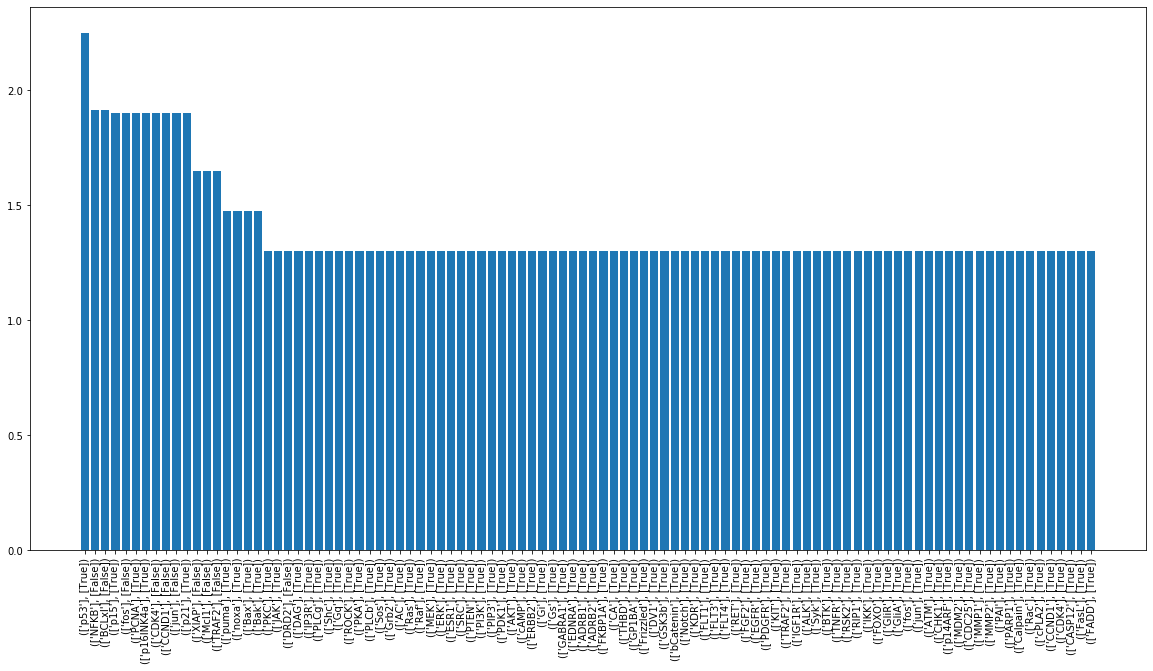

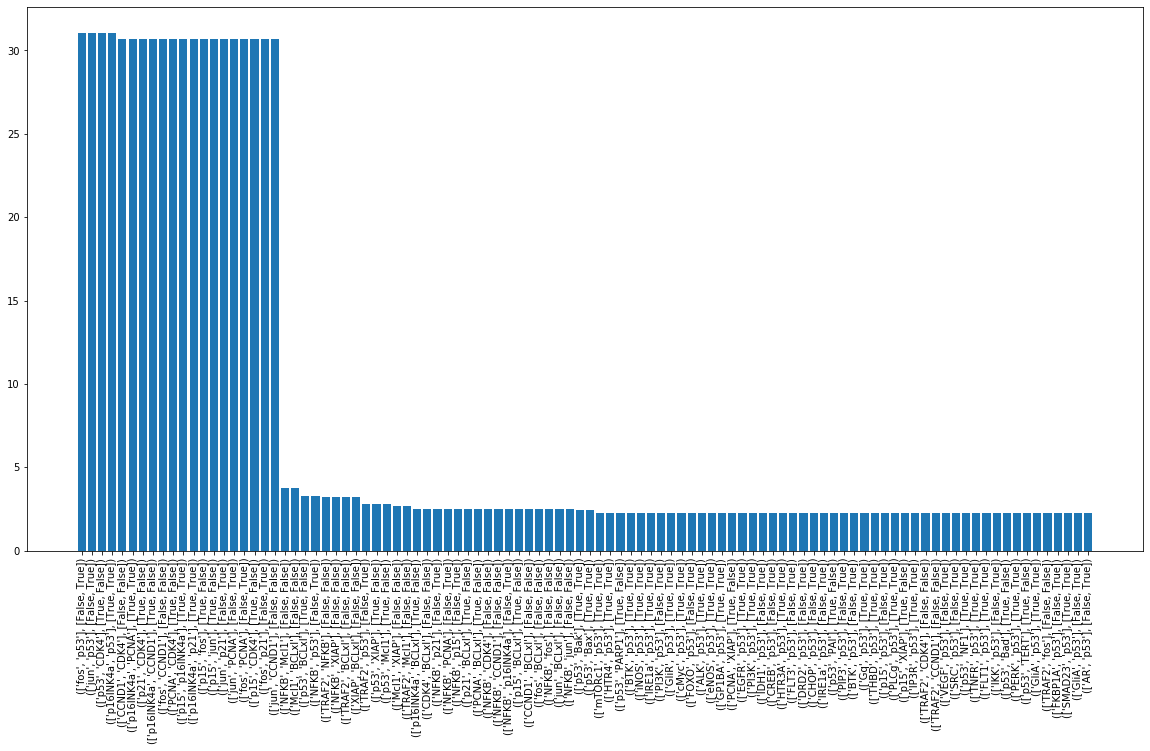

/Users/Radhika/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


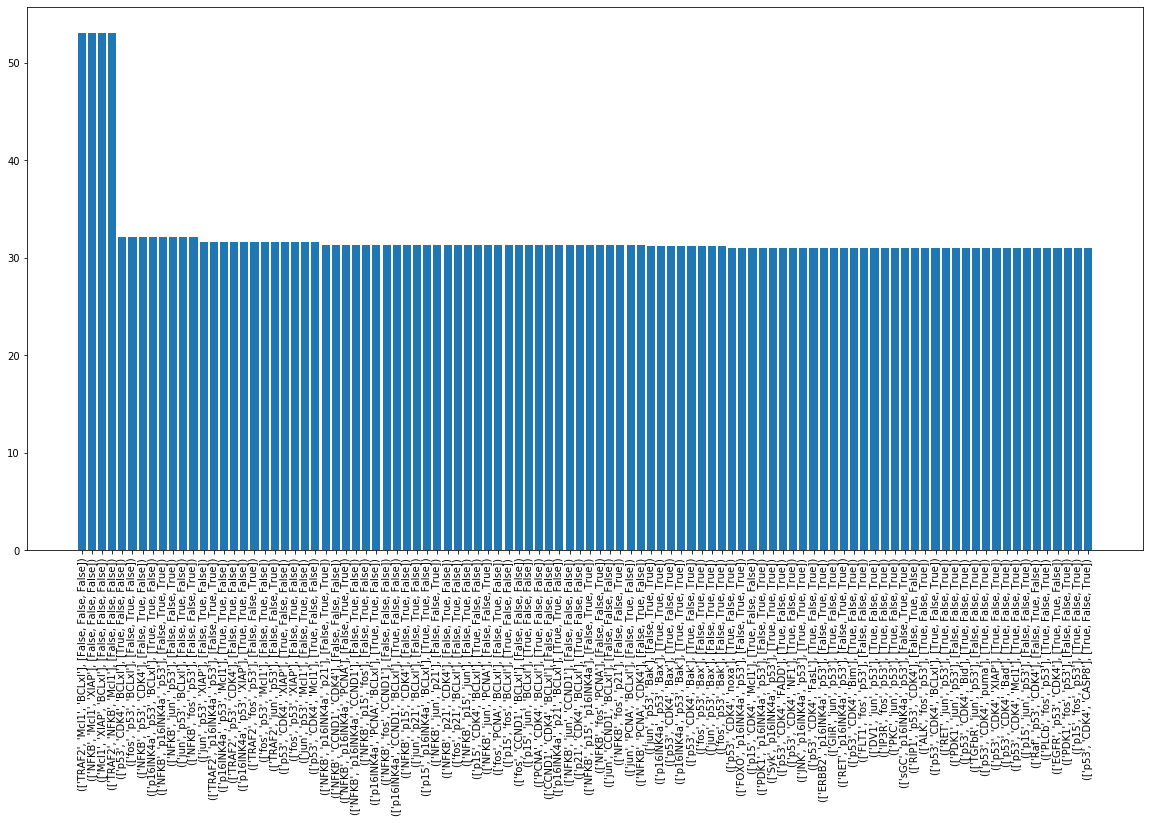

In [12]:
for i in filename:
    BNPLOT(i,N)